<a href="https://colab.research.google.com/github/aryanycce/ML-practicals/blob/main/MLprac4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-09 00:00:00   376000.0       3.0       2.00         1340      1384   
1  2014-05-09 00:00:00   800000.0       4.0       3.25         3540    159430   
2  2014-05-09 00:00:00  2238888.0       5.0       6.50         7270    130017   
3  2014-05-09 00:00:00   324000.0       3.0       2.25          998       904   
4  2014-05-10 00:00:00   549900.0       5.0       2.75         3060      7015   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     3.0           0     0          3        1340              0      2008   
1     2.0           0     0          3        3540              0      2007   
2     2.0           0     0          3        6420            850      2010   
3     2.0           0     0          3         798            200      2007   
4     1.0           0     0          5        1600           1460      1979   

   yr_renovated                   stre

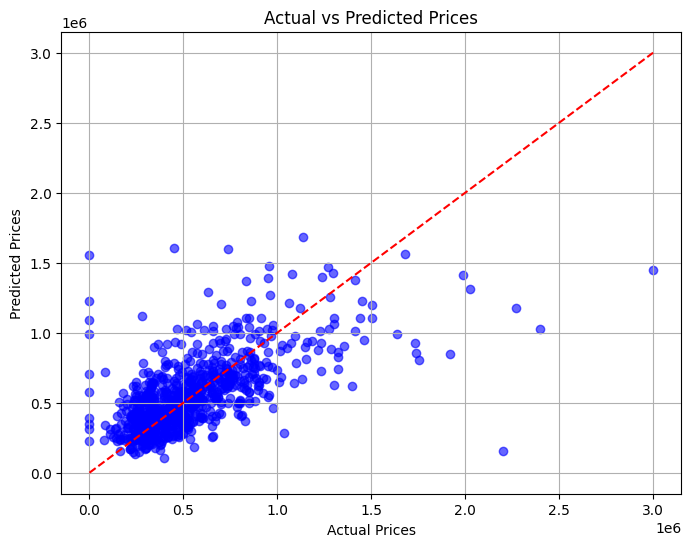

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
# Replace 'house_prices.csv' with the actual path to your dataset
data = pd.read_csv('USA Housing Dataset.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Data Preprocessing
# Assume 'Square_Feet', 'Bedrooms', and 'Age' are features, and 'Price' is the target
X = data[['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'yr_built', 'condition', 'yr_renovated', 'floors']]  # Independent variables
y = data['price']  # Target variable

# Handle missing values if any (drop rows with missing values for simplicity)
#X = X.dropna()
#y = y[X.index]

data.dropna(inplace=True)
print(data.isnull().sum())

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (optional but recommended for models with large variation in features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Print the R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


# Visualization of Actual vs Predicted price

# Step 10: Visualization of Actual vs Predicted Price

import matplotlib.pyplot as plt

# Plotting the Actual vs Predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)  # Scatter plot of actual vs predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line for perfect predictions
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()
